# Find distribution

In [29]:
import sys
import numpy as np
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
from scipy.sparse import issparse

print(ad.__version__)

# Print the version of the libraries and the Python interpreter
print(f"Python version: {sys.version}")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
# print(f"Matplotlib version: {plt.__version__}")
print(f"Seaborn version: {sns.__version__}")
# print(f"SciPy version: {scipy.__version__}")
print(f"Anndata version: {ad.__version__}")

0.11.4
Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
NumPy version: 1.24.3
Pandas version: 1.5.3
Seaborn version: 0.13.2
Anndata version: 0.11.4


In [2]:
adata = ad.read_h5ad("C:/Users/Tycho/Desktop/SchoolTU/year3/q4_RP/data/0fce5dd5-bcec-4288-90b3-19a16b45ad16.h5ad", backed='r')
print(adata)

AnnData object with n_obs × n_vars = 1058909 × 36169 backed at 'C:\\Users\\Tycho\\Desktop\\SchoolTU\\year3\\q4_RP\\data\\0fce5dd5-bcec-4288-90b3-19a16b45ad16.h5ad'
    obs: 'reference_genome', 'gene_annotation_version', 'alignment_software', 'intronic_reads_counted', 'library_id', 'assay_ontology_term_id', 'sequenced_fragment', 'cell_number_loaded', 'institute', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'sample_id', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_collection_method', 'donor_BMI_at_collection', 'tissue_type', 'suspension_derivation_process', 'suspension_enriched_cell_types', 'cell_viability_percentage', 'suspension_uuid', 'suspension_type', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'organism_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'Country', 'nCount_RNA', 'nFeature_RNA', 'TCR_VDJdb', 'TCRa_V_gene', 'TCRa_D_gen

In [3]:
# Find how many distinct donors there are in the dataset
donors = adata.obs['donor_id'].unique()
print(f"Distinct donors: {len(donors)}")

# Find how many distinct donor IDs there are for every cell type
cell_types = adata.obs['cell_type'].unique()
print(f"Distinct cell types: {len(cell_types)}")

for cell_type in cell_types:
    donor_ids = adata.obs[adata.obs['cell_type'] == cell_type]['donor_id'].unique()
    print(f"Distinct donor IDs for {cell_type}: {len(donor_ids)}")

Distinct donors: 508
Distinct cell types: 33
Distinct donor IDs for CD16-positive, CD56-dim natural killer cell, human: 505
Distinct donor IDs for CD14-positive monocyte: 505
Distinct donor IDs for CD8-positive, alpha-beta memory T cell: 505
Distinct donor IDs for regulatory T cell: 502
Distinct donor IDs for central memory CD4-positive, alpha-beta T cell: 506
Distinct donor IDs for memory B cell: 505
Distinct donor IDs for CD14-low, CD16-positive monocyte: 505
Distinct donor IDs for naive thymus-derived CD4-positive, alpha-beta T cell: 506
Distinct donor IDs for naive B cell: 505
Distinct donor IDs for mucosal invariant T cell: 499
Distinct donor IDs for naive thymus-derived CD8-positive, alpha-beta T cell: 504
Distinct donor IDs for effector memory CD4-positive, alpha-beta T cell: 504
Distinct donor IDs for CD1c-positive myeloid dendritic cell: 503
Distinct donor IDs for mature B cell: 483
Distinct donor IDs for gamma-delta T cell: 501
Distinct donor IDs for CD141-positive myeloid de

In [4]:
# Create a distribution of the age of the donors
donor_ages = adata.obs['development_stage'].unique()
print(f"Distinct donor ages: {len(donor_ages)}")
print("Distribution of cells per age:")
number_of_cells_per_age = adata.obs['development_stage'].value_counts()

# Turn number_of_cells_per_age into a dataframe
number_of_cells_per_age = pd.DataFrame(number_of_cells_per_age)
# Reset the index and set the column names
number_of_cells_per_age.reset_index(inplace=True)
number_of_cells_per_age.columns = ['development_stage', 'number_of_cells']
print(number_of_cells_per_age.head())

# Create dataframe with the donor IDs and their development stage
donor_ids = adata.obs['donor_id'].unique()
donor_ids = pd.DataFrame(donor_ids, columns=['donor_id'])
donor_ids['development_stage'] = adata.obs.groupby('donor_id')['development_stage'].first().values

# Print the first 5 rows of the donor IDs dataframe
print(donor_ids.head())

Distinct donor ages: 54
Distribution of cells per age:
   development_stage  number_of_cells
0  33-year-old stage            46219
1  21-year-old stage            43098
2  30-year-old stage            41260
3  41-year-old stage            38168
4  39-year-old stage            38020
      donor_id  development_stage
0  SG_HEL_H02a  34-year-old stage
1  SG_HEL_H09a  23-year-old stage
2  SG_HEL_H10a  47-year-old stage
3  SG_HEL_H11a  37-year-old stage
4  SG_HEL_H12a  37-year-old stage


In [5]:
# Get only the number from the development stage
donor_ids['development_stage'] = donor_ids['development_stage'].str.extract('(\d+)').astype(int).squeeze()
number_of_cells_per_age['development_stage'] = number_of_cells_per_age['development_stage'].str.extract('(\d+)').astype(int).squeeze()

# Sort from youngest to oldest
donor_ids = donor_ids.sort_values('development_stage')
number_of_cells_per_age = number_of_cells_per_age.sort_values('development_stage')

# Print donor IDs dataframe
print(donor_ids.head())
print(number_of_cells_per_age.head())

        donor_id  development_stage
309  JP_RIK_H116                 19
84   SG_HEL_H056                 21
64   SG_HEL_H203                 21
125  SG_HEL_H046                 21
132  SG_HEL_H030                 21
    development_stage  number_of_cells
51                 19             2402
1                  21            43098
30                 22            14574
11                 23            29683
41                 24            10433


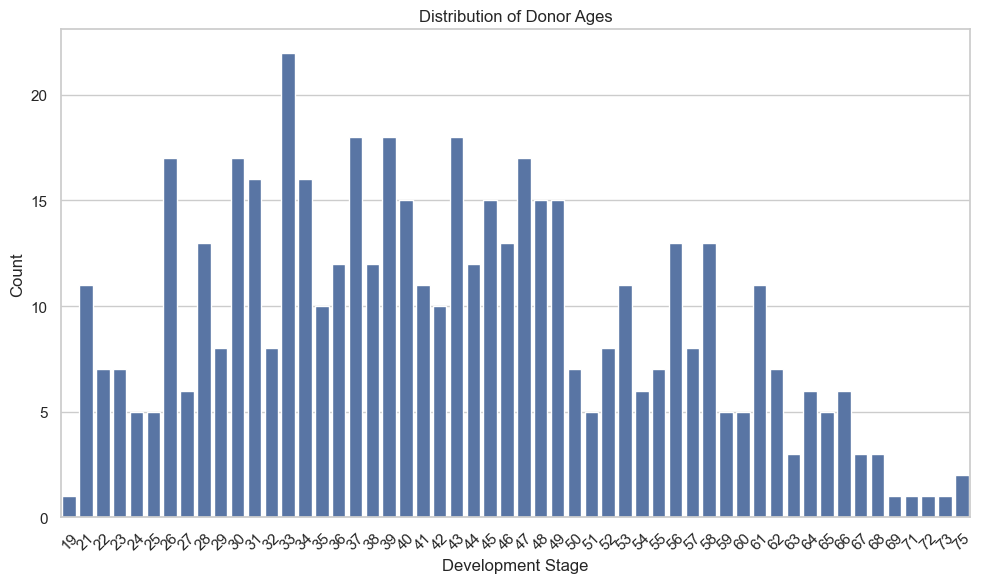

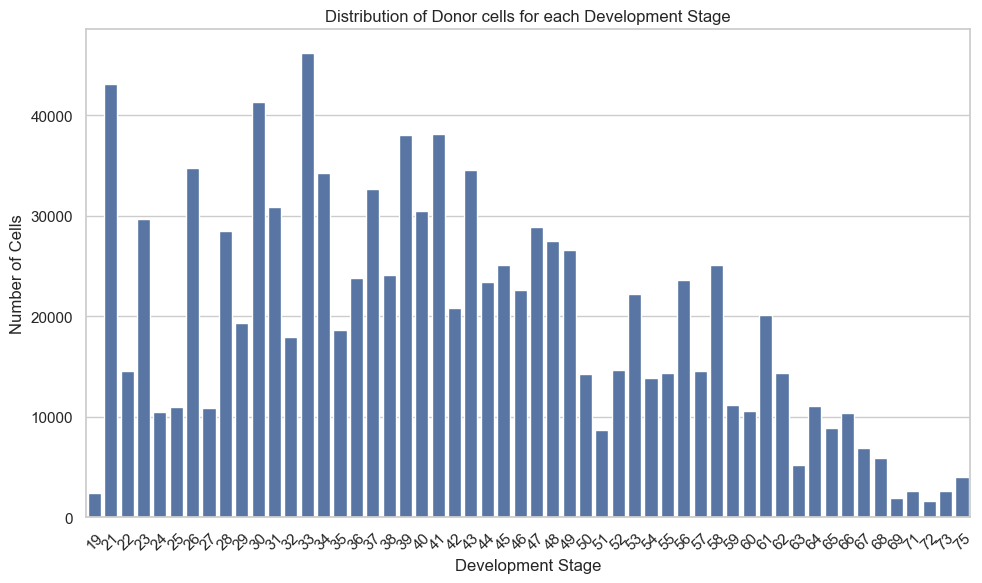

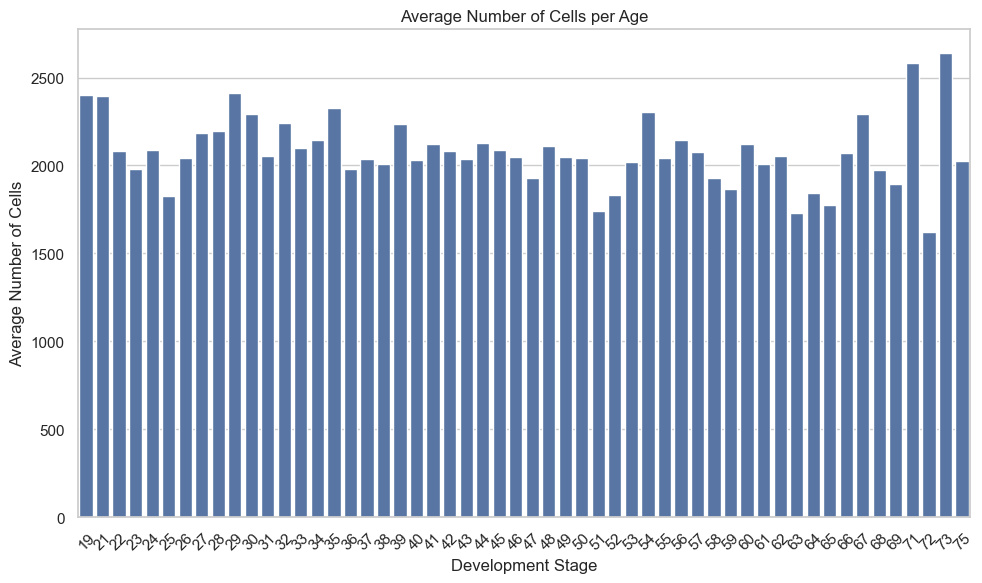

In [6]:
# Plot the distribution of the ages of the donors
order_ages = donor_ids['development_stage'].value_counts().index
order_ages_2 = number_of_cells_per_age['development_stage'].value_counts().index

# Sort the order_ages from youngest to oldest
order_ages = sorted(order_ages)
order_ages_2 = sorted(order_ages_2)

# Create a new datafram with the development stage and the number of donors with that age
age_donor_count = donor_ids['development_stage'].value_counts()
age_donor_count = pd.DataFrame(age_donor_count)
age_donor_count.reset_index(inplace=True)
age_donor_count.columns = ['development_stage', 'number_of_donors']

# Sort the age_donor_count dataframe by development stage
age_donor_count = age_donor_count.sort_values('development_stage')

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=donor_ids, x='development_stage', order=order_ages)
plt.title('Distribution of Donor Ages')
plt.xlabel('Development Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the distribution of the cells for each development stage
plt.figure(figsize=(10, 6))
sns.barplot(data=number_of_cells_per_age, x='development_stage', y='number_of_cells', order=order_ages)
plt.title('Distribution of Donor cells for each Development Stage')
plt.xlabel('Development Stage')
plt.ylabel('Number of Cells')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the average number of cells per age
average_age_per_age = number_of_cells_per_age['number_of_cells'] / age_donor_count['number_of_donors']
average_age_per_age = pd.DataFrame(average_age_per_age)
average_age_per_age.reset_index(inplace=True)
average_age_per_age.columns = ['development_stage', 'average_number_of_cells']
average_age_per_age['development_stage'] = number_of_cells_per_age['development_stage']
average_age_per_age = average_age_per_age.sort_values('development_stage')

# Plot the average number of cells per age
plt.figure(figsize=(10, 6))
sns.barplot(data=average_age_per_age, x='development_stage', y='average_number_of_cells', order=order_ages)
plt.title('Average Number of Cells per Age')
plt.xlabel('Development Stage')
plt.ylabel('Average Number of Cells')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# Split the data into 3 groups based on the amount of donors in each age group 33% 33% 33%
youngest = 0
youngest_last_age = 19

# Set the age of the youngest_last_age when youngest is more than 33% of 508
# Loop over the ages and add the amount of donors to the youngest until it is more than 33% of 508
for age in order_ages:
    if youngest > 169:
        break
    number_of_donors = donor_ids[donor_ids['development_stage'] == age].shape[0]
    youngest += number_of_donors
    youngest_last_age = age

print(f"Youngest: {youngest} ({youngest_last_age})")

middle = 0
middle_last_age = youngest_last_age

for age in order_ages:
    if middle > 140:
        break
    if age <= youngest_last_age:
        continue
    number_of_donors = donor_ids[donor_ids['development_stage'] == age].shape[0]
    middle += number_of_donors
    middle_last_age = age

print(f"Middle: {middle} ({middle_last_age})")

oldest = 0
oldest_last_age = 75

for age in order_ages:
    if age <= middle_last_age:
        continue
    number_of_donors = donor_ids[donor_ids['development_stage'] == age].shape[0]
    oldest += number_of_donors

print(f"Oldest: {oldest} ({oldest_last_age})")


Youngest: 181 (36)
Middle: 142 (46)
Oldest: 185 (75)


In [8]:
# Check how many cells there are in each group
youngest_range = [19, 36]
middle_range = [37, 46]
oldest_range = [47, 75]

number_of_young_cells = 0
number_of_middle_cells = 0
number_of_old_cells = 0

for index, row in number_of_cells_per_age.iterrows():
    if row['development_stage'] <= youngest_last_age:
        number_of_young_cells += row['number_of_cells']
    elif row['development_stage'] <= middle_last_age and row['development_stage'] > youngest_last_age:
        number_of_middle_cells += row['number_of_cells']
    elif row['development_stage'] > middle_last_age:
        number_of_old_cells += row['number_of_cells']
    else:
        print(f"Unknown age: {row['development_stage']}")

print(f"Number of cells in youngest group: {number_of_young_cells}")
print(f"Number of cells in middle group: {number_of_middle_cells}")
print(f"Number of cells in oldest group: {number_of_old_cells}")


Number of cells in youngest group: 417522
Number of cells in middle group: 289840
Number of cells in oldest group: 351547


In [9]:
# Count the number of cells for each donor
donor_counts = adata.obs['donor_id'].value_counts()
print("Number of cells for each donor:")

for donor_id, count in donor_counts.items():
    print(f"Donor ID: {donor_id}, Count: {count}")

Number of cells for each donor:
Donor ID: LONZA3038016, Count: 23131
Donor ID: LONZA3038099, Count: 18475
Donor ID: LONZA3038097, Count: 16931
Donor ID: LONZA3038306, Count: 11385
Donor ID: LONZA3030004, Count: 3517
Donor ID: SG_HEL_H053, Count: 2896
Donor ID: KR_SGI_H057, Count: 2841
Donor ID: KR_SGI_H103, Count: 2840
Donor ID: KR_SGI_H060, Count: 2830
Donor ID: KR_SGI_H015, Count: 2812
Donor ID: KR_SGI_H008, Count: 2809
Donor ID: KR_SGI_H146, Count: 2747
Donor ID: JP_RIK_H149, Count: 2738
Donor ID: JP_RIK_H076, Count: 2683
Donor ID: KR_SGI_H058, Count: 2672
Donor ID: KR_SGI_H014, Count: 2668
Donor ID: KR_SGI_H111, Count: 2664
Donor ID: KR_SGI_H012, Count: 2650
Donor ID: KR_SGI_H127, Count: 2642
Donor ID: KR_SGI_H043, Count: 2641
Donor ID: KR_SGI_H035, Count: 2635
Donor ID: JP_RIK_H045, Count: 2633
Donor ID: JP_RIK_H139, Count: 2628
Donor ID: JP_RIK_H147, Count: 2624
Donor ID: KR_SGI_H156, Count: 2622
Donor ID: KR_SGI_H126, Count: 2622
Donor ID: SG_HEL_H003, Count: 2615
Donor ID: JP_R

In [10]:
# Print a cell for a donor id
donor_id = 'JP_RIK_H007'

donor_cells = adata[adata.obs['donor_id'] == donor_id]
print(f"Number of cells for donor {donor_id}: {donor_cells.shape[0]}")
# Print the first 5 cells for the donor id
print(donor_cells.obs.head())

Number of cells for donor JP_RIK_H007: 80
                          reference_genome gene_annotation_version  \
index                                                                
TCAGGTATCCTATGTT-JP_B1_L1           GRCh38                     v98   
TGGTTAGCAGGCGATA-JP_B1_L1           GRCh38                     v98   
CTGCTGTGTACATCCA-JP_B1_L1           GRCh38                     v98   
AGCGGTCAGGGAGTAA-JP_B1_L1           GRCh38                     v98   
ACACTGATCAACGCTA-JP_B1_L1           GRCh38                     v98   

                          alignment_software intronic_reads_counted  \
index                                                                 
TCAGGTATCCTATGTT-JP_B1_L1  DRAGEN RNA v3.8.4                     no   
TGGTTAGCAGGCGATA-JP_B1_L1  DRAGEN RNA v3.8.4                     no   
CTGCTGTGTACATCCA-JP_B1_L1  DRAGEN RNA v3.8.4                     no   
AGCGGTCAGGGAGTAA-JP_B1_L1  DRAGEN RNA v3.8.4                     no   
ACACTGATCAACGCTA-JP_B1_L1  DRAGEN RNA v3.

In [11]:
# Remove the donors with less than 1000 cells
donor_counts = adata.obs['donor_id'].value_counts()
donor_counts = donor_counts[donor_counts >= 1000]
donor_ids = donor_counts.index

# Create a new adata object with only the donors with more than 100 cells
adata_filtered = adata[adata.obs['donor_id'].isin(donor_ids)]

In [12]:
# Number of donors in the filtered adata object
donor_counts = adata_filtered.obs['donor_id'].value_counts()
print(f"Number of donors in filtered adata object: {len(donor_counts)}")

donor_ids = adata_filtered.obs['donor_id'].unique()
donor_ids = pd.DataFrame(donor_ids, columns=['donor_id'])
donor_ids['development_stage'] = adata_filtered.obs.groupby('donor_id')['development_stage'].first().values

number_of_cells_per_age = adata_filtered.obs['development_stage'].value_counts()
number_of_cells_per_age = pd.DataFrame(number_of_cells_per_age)
number_of_cells_per_age.reset_index(inplace=True)
number_of_cells_per_age.columns = ['development_stage', 'number_of_cells']


print(donor_ids.head())
print(number_of_cells_per_age.head())

Number of donors in filtered adata object: 476
      donor_id  development_stage
0  SG_HEL_H02a  46-year-old stage
1  SG_HEL_H09a  31-year-old stage
2  SG_HEL_H10a  24-year-old stage
3  SG_HEL_H11a  47-year-old stage
4  SG_HEL_H12a  33-year-old stage
   development_stage  number_of_cells
0  33-year-old stage            45413
1  21-year-old stage            42514
2  30-year-old stage            40367
3  41-year-old stage            38168
4  39-year-old stage            37063


In [13]:
# Get only the number from the development stage
donor_ids['development_stage'] = donor_ids['development_stage'].str.extract('(\d+)').astype(int).squeeze()
number_of_cells_per_age['development_stage'] = number_of_cells_per_age['development_stage'].str.extract('(\d+)').astype(int).squeeze()

# Sort from youngest to oldest
donor_ids = donor_ids.sort_values('development_stage')
number_of_cells_per_age = number_of_cells_per_age.sort_values('development_stage')

# Print donor IDs dataframe
print(donor_ids.head())
print(number_of_cells_per_age.head())

        donor_id  development_stage
293  JP_RIK_H128                 19
50   SG_HEL_H194                 21
52   SG_HEL_H018                 21
299  JP_RIK_H136                 21
134  SG_HEL_H323                 21
    development_stage  number_of_cells
51                 19             2402
1                  21            42514
30                 22            14574
11                 23            28709
40                 24            10433


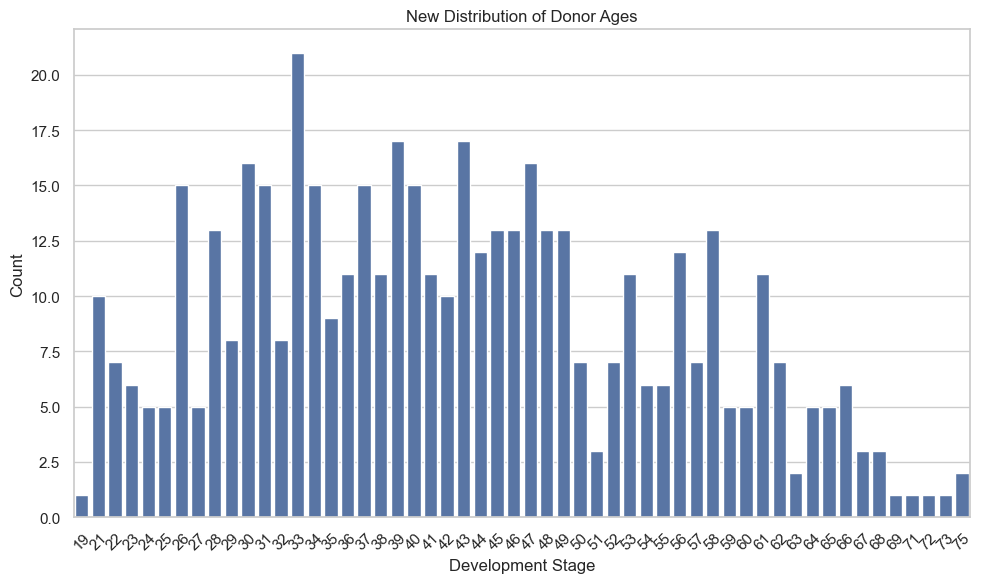

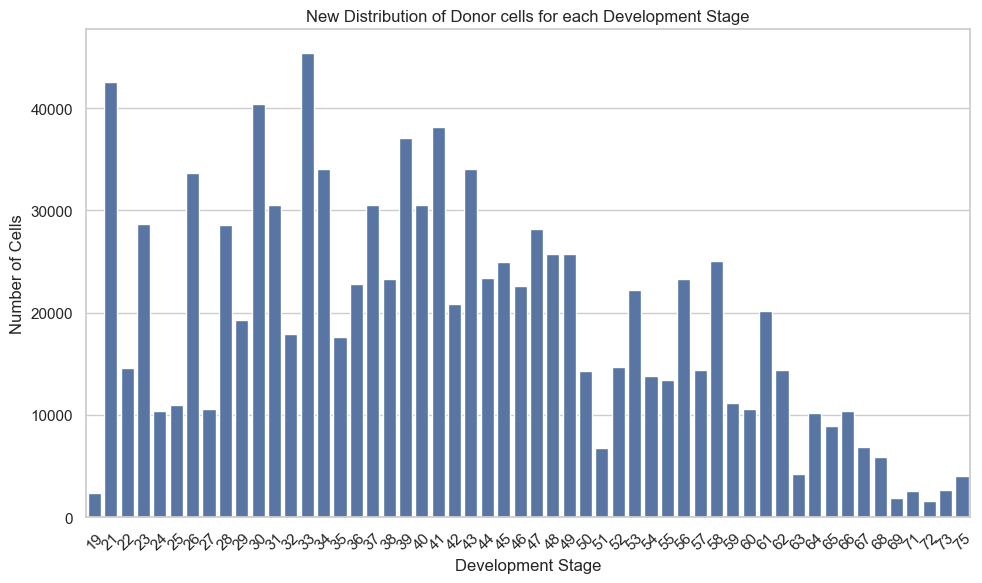

    development_stage  number_of_donors
53                 19                 1
24                 21                10
32                 22                 7
36                 23                 6
39                 24                 5


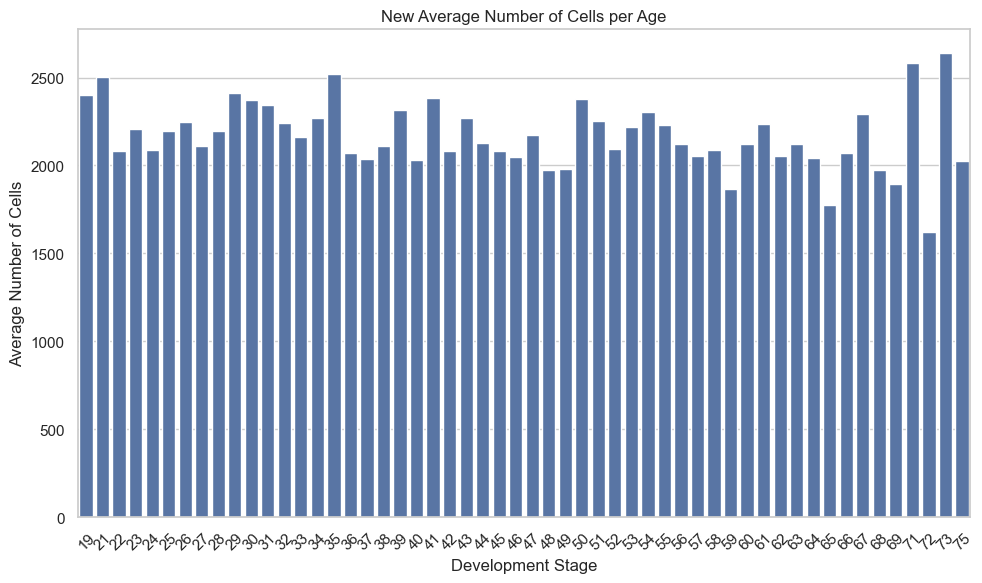

In [14]:
# Plot the distribution of the ages of the donors
order_ages = donor_ids['development_stage'].value_counts().index
order_ages_2 = number_of_cells_per_age['development_stage'].value_counts().index

# Sort the order_ages from youngest to oldest
order_ages = sorted(order_ages)
order_ages_2 = sorted(order_ages_2)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=donor_ids, x='development_stage', order=order_ages)
plt.title('New Distribution of Donor Ages')
plt.xlabel('Development Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the distribution of the cells for each development stage
plt.figure(figsize=(10, 6))
sns.barplot(data=number_of_cells_per_age, x='development_stage', y='number_of_cells', order=order_ages)
plt.title('New Distribution of Donor cells for each Development Stage')
plt.xlabel('Development Stage')
plt.ylabel('Number of Cells')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

age_donor_count = donor_ids['development_stage'].value_counts()
age_donor_count = pd.DataFrame(age_donor_count)
age_donor_count.reset_index(inplace=True)
age_donor_count.columns = ['development_stage', 'number_of_donors']

# Sort the age_donor_count dataframe by development stage
age_donor_count = age_donor_count.sort_values('development_stage')
print(age_donor_count.head())
# Plot the average number of cells per age
average_age_per_age = number_of_cells_per_age['number_of_cells'] / age_donor_count['number_of_donors']
average_age_per_age = pd.DataFrame(average_age_per_age)
average_age_per_age.reset_index(inplace=True)
average_age_per_age.columns = ['development_stage', 'average_number_of_cells']
average_age_per_age['development_stage'] = number_of_cells_per_age['development_stage']
average_age_per_age = average_age_per_age.sort_values('development_stage')
# Plot the average number of cells per age
plt.figure(figsize=(10, 6))
sns.barplot(data=average_age_per_age, x='development_stage', y='average_number_of_cells', order=order_ages)
plt.title('New Average Number of Cells per Age')
plt.xlabel('Development Stage')
plt.ylabel('Average Number of Cells')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Split the data into 3 groups based on the amount of donors in each age group 33% 33% 33%
youngest = 0
youngest_last_age = 19

# Set the age of the youngest_last_age when youngest is more than 33% of 508
# Loop over the ages and add the amount of donors to the youngest until it is more than 33% of 508
for age in order_ages:
    if youngest > 169:
        break
    number_of_donors = donor_ids[donor_ids['development_stage'] == age].shape[0]
    youngest += number_of_donors
    youngest_last_age = age

print(f"Youngest: {youngest} ({youngest_last_age})")

middle = 0
middle_last_age = youngest_last_age

for age in order_ages:
    if middle > 130:
        break
    if age <= youngest_last_age:
        continue
    number_of_donors = donor_ids[donor_ids['development_stage'] == age].shape[0]
    middle += number_of_donors
    middle_last_age = age

print(f"Middle: {middle} ({middle_last_age})")

oldest = 0
oldest_last_age = 75

for age in order_ages:
    if age <= middle_last_age:
        continue
    number_of_donors = donor_ids[donor_ids['development_stage'] == age].shape[0]
    oldest += number_of_donors

print(f"Oldest: {oldest} ({oldest_last_age})")


Youngest: 170 (36)
Middle: 134 (46)
Oldest: 53 (75)


In [30]:
# Find the number of donors for the age ranges below
youngest_range = [19, 30]
middle_range = [40, 50]
oldest_range = [60, 75]

number_of_young_donors = donor_ids[
    (donor_ids['development_stage'] >= youngest_range[0]) & (donor_ids['development_stage'] <= youngest_range[1])
].shape[0]

number_of_middle_donors = donor_ids[
    (donor_ids['development_stage'] >= middle_range[0]) & (donor_ids['development_stage'] <= middle_range[1])
].shape[0]

number_of_old_donors = donor_ids[
    (donor_ids['development_stage'] >= oldest_range[0]) & (donor_ids['development_stage'] <= oldest_range[1])
].shape[0]

print(f"Number of donors in youngest group: {number_of_young_donors}")
print(f"Number of donors in middle group: {number_of_middle_donors}")
print(f"Number of donors in oldest group: {number_of_old_donors}")

Number of donors in youngest group: 91
Number of donors in middle group: 140
Number of donors in oldest group: 53
